In [1]:
#pip install openpyxl

In [2]:
#importando as bibliotecas
import folium
import json
import pandas as pd
from pandas import json_normalize
import geopandas as gpd
import xml.etree.cElementTree as etree
import matplotlib.pyplot as plt

/home/vinicius.vancellote/.local/lib/python3.8/site-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [3]:
#Criando mapa
mapa = folium.Map(location = [-22.9035,-43.2096],
 zoom_start=6)

In [4]:
estado = '/home/vinicius.vancellote/Codigos_Python/Bases/EstacoesPluviometricas/Zonas_Pluviometricas.geojson' #Colocar caminho do local do arquivo json
style =  {'fillColor': 'green', #cor de preenchimento
              'color': 'blue',#cor da linha de contorno
             'weight': 0.45, #espessura da linha
               }

In [5]:
# Opção2
file = open(estado, encoding="utf8")
text = file.read()
folium.GeoJson(text, style_function=lambda x:style ).add_to(mapa)


In [6]:
mapa

In [7]:
with open(estado, encoding="utf8") as file: 
    data = json.load(file)

In [8]:
zonas = pd.json_normalize(data['features'])

In [9]:
zonas

,type,properties.OBJECTID,properties.Name,properties.Endereço,properties.Est,properties.Cod,properties.ShapeSTArea,properties.ShapeSTLength,geometry.type,geometry.coordinates
0,Feature,1,Região 1,"Av. Niemeyer, 121",Vidigal,1,2.553441e+06,10752.168096,Polygon,"[[[-43.21082687388819, -22.98705864031797, 0.0..."
1,Feature,2,Região 2,"Av. Pasteur, 35",Urca,2,2.746435e+06,13636.139715,Polygon,"[[[-43.17559814535199, -22.967590331980837, 0...."
2,Feature,3,Região 3,"Estrada da Gávea, 242",Rocinha,3,1.066526e+07,18616.442565,Polygon,"[[[-43.230494351361735, -22.984262846164107, 0..."
3,Feature,4,Região 4,"Estrada do Sumaré, 670",Tijuca,4,1.120025e+07,14796.007172,Polygon,"[[[-43.20417063079878, -22.908890452016696, 0...."
4,Feature,5,Região 5,"Rua Almirante Alexandrino, 1761",Santa Teresa,5,7.901403e+06,12116.409552,Polygon,"[[[-43.18860618727599, -22.916832129031608, 0...."
5,Feature,6,Região 6,"Av. Atlântica, 4240",Copacabana,6,7.422574e+06,13793.063174,Polygon,"[[[-43.18198299054298, -22.96101694292222, 0.0..."
6,Feature,7,Região 7,"Rua Professor Valadares, 262",Grajaú,7,1.947898e+07,19309.133736,Polygon,"[[[-43.245413488421676, -22.916454071646356, 0..."
7,Feature,8,Região 8,"Rua Orestes Barbosa, 229",Ilha do Governador,8,3.733704e+07,57467.133777,MultiPolygon,"[[[[-43.1717402800634, -22.77662413102957, 0.0..."
8,Feature,9,Região 9,"Largo da Penha, 19",Penha,9,2.979620e+07,36611.597987,MultiPolygon,"[[[[-43.22887259728278, -22.83737371122628, 0...."
9,Feature,10,Região 10,"Largo da Penha, 19",Madureira,10,3.738247e+07,32071.857528,Polygon,"[[[-43.311877240774116, -22.85189771425241, 0...."


In [10]:
estacoes = pd.read_excel('/home/vinicius.vancellote/Codigos_Python/Bases/EstacoesPluviometricas/Estacoes_Pluviometricas.xlsx')

In [11]:
estacoes.head()

,Num,Estacao,Latitude,Longitude,Cota (m),X,Y
0,1,Vidigal,-22.99250,-43.23306,85,681138.532,7456241.298
1,2,Urca,-22.95583,-43.16667,90,688004.213,7460236.157


In [12]:
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [13]:
>>> patch = Point(0.0, 0.0).buffer(10.0)

In [14]:
patch.area

313.6548490545941

In [15]:
>>> import json
>>> from shapely.geometry import mapping, shape

In [16]:
s = shape(json.loads('{"type": "Polygon", "coordinates": [ [ [ -43.210826873888188, -22.987058640317969, 0.0 ], [ -43.211826825624819, -22.986478532919126, 0.0 ], [ -43.213283539485495, -22.985509872097474, 0.0 ], [ -43.217697143734902, -22.984670638755315, 0.0 ], [ -43.21957588182341, -22.984698517344736, 0.0 ], [ -43.223442078263737, -22.984647750828188, 0.0 ], [ -43.225143433212565, -22.984535217064661, 0.0 ], [ -43.227447509532574, -22.984201430595984, 0.0 ], [ -43.230328798124113, -22.98426477714996, 0.0 ], [ -43.230494351361735, -22.984262846164107, 0.0 ], [ -43.238918304287573, -22.988197326588256, 0.0 ], [ -43.248858354193779, -22.996839571642884, 0.0 ], [ -43.251505605484894, -22.999140909583442, 0.0 ], [ -43.251552582398482, -22.999181746791944, 0.0 ], [ -43.248245238790318, -22.99955558835914, 0.0 ], [ -43.248129982360879, -22.999692479842075, 0.0 ], [ -43.24808536702124, -22.999695920824095, 0.0 ], [ -43.248030404358438, -22.999714367066602, 0.0 ], [ -43.247973935757813, -22.999728642599756, 0.0 ], [ -43.247923252087396, -22.99975580451882, 0.0 ], [ -43.247868951114519, -22.999775884416035, 0.0 ], [ -43.247822966052773, -22.999809330234772, 0.0 ], [ -43.24776932778758, -22.999831041111584, 0.0 ], [ -43.2477336893133, -22.999848707727025, 0.0 ], [ -43.247701375663652, -22.999873365509536, 0.0 ], [ -43.24768903697052, -22.999907363325974, 0.0 ], [ -43.247682466263839, -22.999947928732325, 0.0 ], [ -43.247648404167677, -22.999979339119449, 0.0 ], [ -43.247602607434587, -23.000013148170929, 0.0 ], [ -43.247556624178749, -23.000046593923866, 0.0 ], [ -43.247512847604618, -23.000082592622288, 0.0 ], [ -43.247467630954979, -23.000116949880347, 0.0 ], [ -43.247425781479038, -23.000154866283925, 0.0 ], [ -43.247388853859135, -23.000196811470868, 0.0 ], [ -43.247357921765392, -23.000242885827422, 0.0 ], [ -43.247344550681227, -23.000281205915122, 0.0 ], [ -43.247343039885372, -23.000322731257761, 0.0 ], [ -43.247343407903656, -23.000362287978906, 0.0 ], [ -43.247317416487078, -23.0004108561461, 0.0 ], [ -43.247274315296153, -23.000447492571777, 0.0 ], [ -43.247235357999678, -23.0004879712729, 0.0 ], [ -43.247225164974374, -23.000499326262123, 0.0 ], [ -43.247198044400186, -23.000529729717673, 0.0 ], [ -43.247157644492198, -23.000568836951164, 0.0 ], [ -43.247115696469507, -23.000606661863461, 0.0 ], [ -43.247075773292877, -23.000646315277169, 0.0 ], [ -43.247037783854147, -23.000687525270489, 0.0 ], [ -43.246989589044155, -23.00071823630401, 0.0 ], [ -43.246942930046636, -23.000750951935775, 0.0 ], [ -43.246890243246973, -23.000774481827023, 0.0 ], [ -43.246839750748492, -23.000801825188137, 0.0 ], [ -43.246784880164448, -23.00082072350807, 0.0 ], [ -43.24673029283354, -23.000840347383598, 0.0 ], [ -43.246673917673995, -23.000854895272354, 0.0 ], [ -43.246618104370505, -23.000871255459671, 0.0 ], [ -43.246561976299674, -23.000889327030524, 0.0 ], [ -43.246507641149535, -23.000904528679669, 0.0 ], [ -43.2464557168203, -23.000929509934483, 0.0 ], [ -43.246399900550351, -23.000945869105831, 0.0 ], [ -43.246350269147648, -23.000974578217509, 0.0 ], [ -43.246292328027437, -23.000981973634225, 0.0 ], [ -43.246269321354788, -23.000988400479127, 0.0 ], [ -43.246251023287691, -23.000992713961363, 0.0 ], [ -43.246195587003285, -23.001010160924945, 0.0 ], [ -43.246139773792308, -23.001026429730089, 0.0 ], [ -43.246086042913433, -23.001047777749626, 0.0 ], [ -43.246075689435337, -23.001050630483228, 0.0 ], [ -43.245052515369188, -23.001148776439216, 0.0 ], [ -43.245000104881015, -23.001141402815101, 0.0 ], [ -43.244941720907221, -23.00113777653587, 0.0 ], [ -43.244883225414313, -23.001135230850871, 0.0 ], [ -43.244824726806655, -23.001132775414629, 0.0 ], [ -43.24476633448981, -23.00112987051407, 0.0 ], [ -43.244707814470111, -23.001129221796766, 0.0 ], [ -43.244649288601032, -23.001129025420095, 0.0 ], [ -43.244590735881218, -23.001130904831637, 0.0 ], [ -43.244532284391546, -23.001132424124517, 0.0 ], [ -43.244473759705777, -23.001132136488074, 0.0 ], [ -43.244415216331852, -23.001133293499652, 0.0 ], [ -43.2443566916374, -23.001133006722821, 0.0 ], [ -43.244298175133842, -23.00113208697854, 0.0 ], [ -43.244239660969114, -23.001130986628979, 0.0 ], [ -43.244181157321407, -23.001129073631279, 0.0 ], [ -43.244123944822746, -23.001117691120484, 0.0 ], [ -43.244067143848284, -23.00110496219343, 0.0 ], [ -43.244009729861126, -23.001094301652262, 0.0 ], [ -43.243953848207163, -23.00107814949272, 0.0 ], [ -43.243895474651019, -23.001073799604182, 0.0 ], [ -43.243836955069234, -23.001072969961328, 0.0 ], [ -43.243778837272849, -23.001079007916694, 0.0 ], [ -43.243720347689276, -23.001076011248582, 0.0 ], [ -43.243662184792932, -23.001070309039303, 0.0 ], [ -43.243606607110259, -23.001053436790013, 0.0 ], [ -43.24356436786352, -23.001015853885509, 0.0 ], [ -43.243517576677185, -23.000983276640284, 0.0 ], [ -43.243478196531356, -23.000943286298945, 0.0 ], [ -43.243438522652127, -23.000903382091995, 0.0 ], [ -43.243387059638252, -23.000877615243812, 0.0 ], [ -43.243329388844707, -23.000886730164577, 0.0 ], [ -43.24327238074077, -23.000874719294515, 0.0 ], [ -43.243232019150199, -23.00083534923829, 0.0 ], [ -43.243180254641899, -23.00081012080949, 0.0 ], [ -43.243125686342559, -23.000790642566297, 0.0 ], [ -43.243070312294996, -23.000773049958539, 0.0 ], [ -43.242987158189642, -23.000761382815888, 0.0 ], [ -43.242966125130408, -23.000743449692461, 0.0 ], [ -43.242938903461599, -23.000713706469433, 0.0 ], [ -43.242923409560341, -23.000659804111361, 0.0 ], [ -43.242872045823418, -23.000633768194948, 0.0 ], [ -43.242828519330864, -23.000597613894499, 0.0 ], [ -43.242775073553034, -23.000619597875495, 0.0 ], [ -43.242723628799148, -23.000614963240039, 0.0 ], [ -43.24267852710247, -23.000587461578139, 0.0 ], [ -43.242700055087084, -23.000537038629997, 0.0 ], [ -43.242642425744066, -23.000527820998386, 0.0 ], [ -43.242619733215811, -23.000577777683148, 0.0 ], [ -43.242590688926406, -23.000530677471215, 0.0 ], [ -43.242534399645642, -23.000516055485928, 0.0 ], [ -43.242476141669236, -23.000510262397771, 0.0 ], [ -43.242447885930368, -23.000500194956814, 0.0 ], [ -43.242421573811839, -23.000490692719332, 0.0 ], [ -43.242364158108863, -23.000480121885438, 0.0 ], [ -43.242305773595447, -23.000476493741761, 0.0 ], [ -43.242248459892032, -23.000465655793779, 0.0 ], [ -43.242190517017939, -23.000458056393114, 0.0 ], [ -43.242132125311358, -23.000455060239304, 0.0 ], [ -43.242082410464754, -23.000466591993206, 0.0 ], [ -43.240315662955901, -22.999997050093899, 0.0 ], [ -43.240311778443818, -22.999975551437544, 0.0 ], [ -43.24029430498495, -22.999923793285216, 0.0 ], [ -43.240240743295104, -22.999901976445603, 0.0 ], [ -43.240255177941201, -22.999849488333226, 0.0 ], [ -43.240197020476465, -22.999843424627489, 0.0 ], [ -43.240147648198942, -22.999840432271537, 0.0 ], [ -43.240115137954078, -22.999780859985108, 0.0 ], [ -43.240172581041016, -22.999772354151386, 0.0 ], [ -43.240125492698304, -22.99974022418191, 0.0 ], [ -43.240098846622679, -22.999751008417984, 0.0 ], [ -43.239985193446557, -22.999542749755523, 0.0 ], [ -43.239998669336487, -22.999530572046574, 0.0 ], [ -43.240021127469205, -22.999498671392114, 0.0 ], [ -43.240014711859565, -22.999459408760718, 0.0 ], [ -43.239973221812015, -22.999454432376055, 0.0 ], [ -43.239934239673232, -22.999449380909045, 0.0 ], [ -43.239866197233049, -22.999324698596581, 0.0 ], [ -43.23986508471414, -22.999315786705331, 0.0 ], [ -43.239896405431431, -22.99927007946626, 0.0 ], [ -43.239931519224342, -22.99924012739277, 0.0 ], [ -43.239920568379716, -22.999212099723721, 0.0 ], [ -43.239868272970142, -22.999190298654462, 0.0 ], [ -43.239810432621375, -22.999182521654518, 0.0 ], [ -43.239800590134223, -22.99912913249317, 0.0 ], [ -43.239849649383252, -22.999099605462259, 0.0 ], [ -43.239829432622052, -22.999048719821577, 0.0 ], [ -43.239824183278238, -22.998994750486879, 0.0 ], [ -43.239811408796783, -22.998941870562536, 0.0 ], [ -43.239802438443753, -22.998888852313755, 0.0 ], [ -43.239790005964608, -22.99883209218569, 0.0 ], [ -43.239783893781492, -22.998791928970022, 0.0 ], [ -43.239773088395026, -22.99875261572879, 0.0 ], [ -43.239761504562324, -22.998728196813637, 0.0 ], [ -43.239726728227417, -22.998724468062449, 0.0 ], [ -43.239709959159939, -22.998738910107338, 0.0 ], [ -43.239714385046355, -22.998751149533874, 0.0 ], [ -43.239687336231206, -22.998753288882487, 0.0 ], [ -43.23966882569426, -22.998736467051785, 0.0 ], [ -43.239638346726572, -22.998739920121558, 0.0 ], [ -43.239610847037135, -22.998754334073322, 0.0 ], [ -43.239620501920598, -22.998792098450917, 0.0 ], [ -43.239566938631093, -22.998770372598461, 0.0 ], [ -43.23956088428789, -22.998765235587282, 0.0 ], [ -43.239526824322461, -22.99870282214345, 0.0 ], [ -43.239534327159134, -22.998697585707671, 0.0 ], [ -43.239557246398341, -22.998660364071768, 0.0 ], [ -43.239514810484359, -22.998623047994787, 0.0 ], [ -43.23946234747779, -22.998599074920442, 0.0 ], [ -43.239403963521674, -22.998595627268333, 0.0 ], [ -43.239427916731209, -22.99854622601822, 0.0 ], [ -43.23945914298379, -22.998500427505267, 0.0 ], [ -43.239424099692279, -22.998457051976278, 0.0 ], [ -43.239365568108425, -22.998457394564472, 0.0 ], [ -43.239318676035168, -22.998424997457178, 0.0 ], [ -43.239265610088474, -22.998447883929774, 0.0 ], [ -43.239240880278984, -22.998496917106095, 0.0 ], [ -43.239294942969387, -22.998517655263012, 0.0 ], [ -43.239239225146001, -22.998534193622014, 0.0 ], [ -43.239180850808829, -22.998529932351246, 0.0 ], [ -43.239136306101656, -22.998565017964417, 0.0 ], [ -43.239109667548668, -22.998582828731507, 0.0 ], [ -43.238809920204204, -22.998498818897151, 0.0 ], [ -43.238812265240355, -22.998496935938192, 0.0 ], [ -43.238860844758186, -22.998466864756978, 0.0 ], [ -43.23887965457628, -22.998415509095128, 0.0 ], [ -43.238821707712162, -22.998423262966419, 0.0 ], [ -43.238763185334896, -22.998422973302251, 0.0 ], [ -43.238706591161801, -22.998409249671752, 0.0 ], [ -43.238674991989789, -22.998363655583947, 0.0 ], [ -43.238635714878242, -22.998323487381903, 0.0 ], [ -43.238600674877638, -22.998280108109714, 0.0 ], [ -43.238546513884572, -22.998259369534697, 0.0 ], [ -43.238490226265156, -22.998244655890087, 0.0 ], [ -43.238434650894433, -22.998227600422688, 0.0 ], [ -43.238377546504211, -22.99821576920759, 0.0 ], [ -43.238319493282916, -22.998209252680621, 0.0 ], [ -43.238264324264314, -22.998191029521699, 0.0 ], [ -43.238212563698156, -22.99816580140746, 0.0 ], [ -43.238164086345584, -22.998135551843717, 0.0 ], [ -43.238113221782868, -22.998108707281361, 0.0 ], [ -43.238060862051057, -22.998084554303208, 0.0 ], [ -43.238017340038084, -22.998048219118512, 0.0 ], [ -43.237969955528257, -22.998016447383471, 0.0 ], [ -43.237916895560531, -22.997993641138265, 0.0 ], [ -43.237858844789031, -22.997986945672118, 0.0 ], [ -43.237801448673892, -22.997997595052464, 0.0 ], [ -43.237753864693957, -22.997966091047058, 0.0 ], [ -43.237702804630388, -22.997939515097787, 0.0 ], [ -43.237713056699121, -22.997886168860152, 0.0 ], [ -43.237731072708442, -22.997880949268758, 0.0 ], [ -43.237754770712989, -22.997888800382501, 0.0 ], [ -43.237769084302315, -22.997898351347448, 0.0 ], [ -43.237783395943076, -22.997907902289509, 0.0 ], [ -43.237795767326077, -22.997916709202194, 0.0 ], [ -43.237812608262679, -22.997919426943426, 0.0 ], [ -43.237820146255032, -22.997909756121302, 0.0 ], [ -43.237820687410789, -22.997898203152694, 0.0 ], [ -43.237802844931188, -22.997890057796596, 0.0 ], [ -43.237779567700535, -22.997879774953887, 0.0 ], [ -43.237724797425273, -22.997860833616986, 0.0 ], [ -43.237671237199287, -22.99783892567616, 0.0 ], [ -43.237616569979977, -22.997819712730276, 0.0 ], [ -43.237564211802564, -22.997795380811283, 0.0 ], [ -43.23751205009917, -22.997770868647255, 0.0 ], [ -43.237461485044676, -22.997743666002744, 0.0 ], [ -43.237412016275336, -22.997714671259189, 0.0 ], [ -43.237358799380736, -22.997696379223118, 0.0 ], [ -43.237304043518826, -22.997683849533775, 0.0 ], [ -43.237243534367586, -22.997678839563608, 0.0 ], [ -43.237192071881168, -22.997653072624011, 0.0 ], [ -43.237142702909111, -22.997623986800761, 0.0 ], [ -43.23708864115644, -22.997603156743686, 0.0 ], [ -43.237031330807056, -22.997592043398814, 0.0 ], [ -43.236977969206627, -22.997569955932686, 0.0 ], [ -43.236926110644816, -22.997544725425829, 0.0 ], [ -43.236876442354237, -22.997516086811473, 0.0 ], [ -43.236828958634604, -22.997484403955749, 0.0 ], [ -43.236778293947481, -22.997457381507239, 0.0 ], [ -43.236728129847769, -22.997429370363864, 0.0 ], [ -43.23667496828152, -22.997406836214413, 0.0 ], [ -43.236618681888935, -22.997391848321413, 0.0 ], [ -43.236564520035756, -22.99737137910013, 0.0 ], [ -43.236519119400903, -22.99733718901939, 0.0 ], [ -43.236470973022598, -22.997311549090124, 0.0 ], [ -43.236415633104919, -22.997283931737041, 0.0 ], [ -43.236361115293349, -22.997253253165926, 0.0 ], [ -43.236315666797644, -22.997222678292893, 0.0 ], [ -43.236272783508532, -22.997189868945021, 0.0 ], [ -43.236233303407239, -22.9971578217326, 0.0 ], [ -43.23617882708453, -22.997131388782631, 0.0 ], [ -43.23612355657653, -22.997113527708699, 0.0 ], [ -43.236073390635525, -22.997085603944832, 0.0 ], [ -43.23602279413462, -22.997053433764787, 0.0 ], [ -43.235970768500728, -22.99702585227973, 0.0 ], [ -43.235916861951736, -22.997008274534942, 0.0 ], [ -43.235873196594063, -22.996975459986544, 0.0 ], [ -43.235831166076345, -22.996937243559913, 0.0 ], [ -43.235785036101554, -22.996906659146937, 0.0 ], [ -43.235718472711397, -22.996902033592555, 0.0 ], [ -43.235669128038225, -22.996886132975067, 0.0 ], [ -43.235617865745624, -22.996860095965165, 0.0 ], [ -43.235561001059729, -22.996852328342289, 0.0 ], [ -43.235546224392735, -22.996853283479659, 0.0 ], [ -43.235126921642888, -22.996637791560421, 0.0 ], [ -43.235126795110979, -22.996637620377772, 0.0 ], [ -43.235126549559361, -22.996637600483368, 0.0 ], [ -43.235018045186095, -22.996581836451774, 0.0 ], [ -43.235017891226832, -22.996551068884816, 0.0 ], [ -43.235045434232795, -22.996525820571964, 0.0 ], [ -43.235012721800707, -22.996498454936145, 0.0 ], [ -43.234996703276899, -22.996500172802314, 0.0 ], [ -43.234939588496779, -22.996511727347322, 0.0 ], [ -43.234928897738058, -22.996478646135827, 0.0 ], [ -43.234910949523993, -22.996433655043901, 0.0 ], [ -43.23492078567925, -22.996412363404044, 0.0 ], [ -43.234926862863915, -22.996372516535505, 0.0 ], [ -43.234935314676051, -22.996337662882116, 0.0 ], [ -43.234906891149301, -22.996340687351701, 0.0 ], [ -43.234896726220654, -22.996364683559438, 0.0 ], [ -43.234847094566035, -22.996393300536315, 0.0 ], [ -43.234856764568214, -22.996339856830371, 0.0 ], [ -43.234798719615064, -22.99633270972878, 0.0 ], [ -43.234766602899661, -22.996334698754428, 0.0 ], [ -43.234708086647387, -22.996333864974108, 0.0 ], [ -43.234675999103757, -22.996288536542384, 0.0 ], [ -43.234619440212207, -22.996302354784817, 0.0 ], [ -43.234560910861184, -22.996302604459007, 0.0 ], [ -43.234502388534679, -22.99630231416883, 0.0 ], [ -43.234473796088295, -22.996302127254815, 0.0 ], [ -43.233876261748748, -22.995995029614768, 0.0 ], [ -43.233885837923062, -22.99591823670891, 0.0 ], [ -43.233910275276429, -22.99586179710267, 0.0 ], [ -43.233925914898109, -22.995844363940513, 0.0 ], [ -43.233978221350476, -22.995819930182488, 0.0 ], [ -43.234026609496347, -22.995789497130648, 0.0 ], [ -43.2340274118731, -22.995735322470871, 0.0 ], [ -43.234030943858286, -22.995681270359224, 0.0 ], [ -43.234047032626734, -22.995629161647773, 0.0 ], [ -43.234048811217924, -22.995575000581205, 0.0 ], [ -43.234032904051986, -22.995522807804608, 0.0 ], [ -43.234033027628634, -22.995468624670668, 0.0 ], [ -43.234053974933438, -22.995418018617237, 0.0 ], [ -43.234072394933456, -22.99536665923371, 0.0 ], [ -43.234119249461408, -22.995334131134939, 0.0 ], [ -43.234060793389339, -22.995336278760249, 0.0 ], [ -43.234005826146301, -22.995317604926001, 0.0 ], [ -43.234019485643238, -22.995264928200648, 0.0 ], [ -43.23399280140297, -22.995216679852188, 0.0 ], [ -43.233939140656624, -22.995195130821983, 0.0 ], [ -43.233924998867238, -22.995142505297498, 0.0 ], [ -43.233866468636293, -22.995142937145506, 0.0 ], [ -43.233817100574626, -22.995113758258366, 0.0 ], [ -43.233763338823508, -22.995092480764949, 0.0 ], [ -43.233755952550823, -22.995094231570988, 0.0 ], [ -43.233760834175463, -22.994808196822689, 0.0 ], [ -43.232666286755304, -22.995375470897173, 0.0 ], [ -43.232618149139952, -22.995357661162828, 0.0 ], [ -43.232559641597526, -22.995356195478745, 0.0 ], [ -43.232506778348942, -22.995355442958502, 0.0 ], [ -43.231800876238815, -22.995036300015332, 0.0 ], [ -43.231821116611634, -22.994998835630952, 0.0 ], [ -43.231797082777106, -22.994949440780346, 0.0 ], [ -43.231796228010936, -22.99489524947629, 0.0 ], [ -43.231783162239871, -22.994842456110273, 0.0 ], [ -43.231787050487185, -22.994823719810693, 0.0 ], [ -43.233341217123737, -22.993640900288913, 0.0 ], [ -43.232559204335679, -22.992284774596389, 0.0 ], [ -43.232372761867843, -22.992137536730731, 0.0 ], [ -43.232358186973578, -22.992107227724922, 0.0 ], [ -43.232351181901826, -22.992053418376297, 0.0 ], [ -43.232338997178502, -22.992000453362692, 0.0 ], [ -43.2322968604823, -22.991962867051107, 0.0 ], [ -43.232242902627362, -22.991941856931025, 0.0 ], [ -43.232190644296985, -22.991917523593148, 0.0 ], [ -43.2321353753252, -22.991899750668793, 0.0 ], [ -43.232092450889155, -22.9918629655456, 0.0 ], [ -43.232064588609681, -22.991815246503201, 0.0 ], [ -43.232021563531688, -22.991778553253038, 0.0 ], [ -43.231964251240314, -22.991767890615307, 0.0 ], [ -43.231905733307876, -22.991767418001494, 0.0 ], [ -43.231903529859757, -22.991766969876462, 0.0 ], [ -43.231785782010228, -22.991673980121874, 0.0 ], [ -43.231784481366283, -22.991670793205763, 0.0 ], [ -43.231772002115015, -22.991617918787885, 0.0 ], [ -43.231787119420694, -22.99156552764023, 0.0 ], [ -43.231753362856416, -22.991521261913661, 0.0 ], [ -43.231664697724185, -22.991528850970642, 0.0 ], [ -43.231608469335015, -22.991502305822177, 0.0 ], [ -43.231594686889309, -22.991467114713505, 0.0 ], [ -43.231539866746928, -22.991459909518071, 0.0 ], [ -43.231487310068189, -22.991436115361171, 0.0 ], [ -43.231483917338075, -22.991382075409476, 0.0 ], [ -43.23144966779968, -22.991338075936717, 0.0 ], [ -43.231398606015944, -22.991311770822829, 0.0 ], [ -43.2313430364444, -22.991294713105326, 0.0 ], [ -43.231304849887813, -22.991294168397726, 0.0 ], [ -43.231224735668825, -22.991230898680257, 0.0 ], [ -43.231223124188766, -22.991177601957343, 0.0 ], [ -43.231173361714973, -22.99114905277056, 0.0 ], [ -43.231124393583215, -22.991119428786568, 0.0 ], [ -43.231079886293763, -22.991084164523144, 0.0 ], [ -43.231028829021056, -22.99105767603001, 0.0 ], [ -43.230981150481291, -22.991038528177878, 0.0 ], [ -43.23095246857455, -22.991015876452806, 0.0 ], [ -43.230933033416179, -22.990998540371372, 0.0 ], [ -43.230933739322545, -22.990944365584937, 0.0 ], [ -43.230926050803745, -22.990890728270589, 0.0 ], [ -43.23091308337532, -22.990837845639533, 0.0 ], [ -43.230865506662497, -22.990806249522635, 0.0 ], [ -43.230854398804695, -22.99085019402812, 0.0 ], [ -43.230848652708453, -22.990857084193998, 0.0 ], [ -43.230805473333746, -22.990877191318773, 0.0 ], [ -43.230787400058588, -22.990885514186633, 0.0 ], [ -43.230663300080266, -22.99078750583671, 0.0 ], [ -43.229924171504514, -22.991160343191563, 0.0 ], [ -43.229893760809389, -22.991154716017959, 0.0 ], [ -43.229846876812886, -22.991167105592421, 0.0 ], [ -43.22980645737735, -22.991192389723857, 0.0 ], [ -43.229774799105627, -22.991226712800607, 0.0 ], [ -43.229735050497467, -22.991252911065597, 0.0 ], [ -43.229686304061687, -22.991251190480945, 0.0 ], [ -43.229639352328498, -22.991238925228679, 0.0 ], [ -43.229591680427802, -22.991229453155881, 0.0 ], [ -43.22954452305288, -22.991217999220346, 0.0 ], [ -43.229528015755619, -22.99120481087261, 0.0 ], [ -43.22955542474368, -22.991167460306162, 0.0 ], [ -43.229579137960762, -22.991151650274176, 0.0 ], [ -43.22957220699459, -22.991137124099179, 0.0 ], [ -43.229554227403511, -22.991124641733098, 0.0 ], [ -43.229506760984151, -22.991114450401557, 0.0 ], [ -43.229474315456407, -22.991119234173944, 0.0 ], [ -43.229435622955833, -22.991146796024758, 0.0 ], [ -43.229397556665184, -22.991148628112313, 0.0 ], [ -43.229407401696974, -22.991104398706344, 0.0 ], [ -43.229415921353379, -22.991071896764506, 0.0 ], [ -43.229376074514121, -22.991097997214759, 0.0 ], [ -43.229354318453446, -22.991113467876826, 0.0 ], [ -43.229321341620611, -22.991084200921392, 0.0 ], [ -43.229313735899709, -22.991128817474866, 0.0 ], [ -43.229279665501736, -22.991161036480655, 0.0 ], [ -43.229231473856217, -22.991154175512751, 0.0 ], [ -43.22918563757321, -22.991138582240431, 0.0 ], [ -43.229138990275715, -22.99112541810652, 0.0 ], [ -43.229090462881778, -22.991121715802525, 0.0 ], [ -43.22904184323172, -22.991125235900036, 0.0 ], [ -43.228993141557169, -22.991127491707026, 0.0 ], [ -43.22894442717552, -22.991130646788498, 0.0 ], [ -43.228895660740314, -22.99113046452597, 0.0 ], [ -43.228849821952316, -22.99111514204381, 0.0 ], [ -43.228812155763244, -22.991086455584949, 0.0 ], [ -43.228775280596899, -22.991056874919654, 0.0 ], [ -43.2287273005552, -22.991048752809316, 0.0 ], [ -43.2286814629947, -22.991033339989968, 0.0 ], [ -43.228666220141456, -22.990990454655918, 0.0 ], [ -43.228685198791283, -22.990948856873349, 0.0 ], [ -43.228719559448415, -22.990916824563097, 0.0 ], [ -43.228761890861357, -22.990894448223361, 0.0 ], [ -43.228801543147, -22.990868161533736, 0.0 ], [ -43.228842166122703, -22.990849561559891, 0.0 ], [ -43.22879366103129, -22.990844233037702, 0.0 ], [ -43.228744981649641, -22.99084486264077, 0.0 ], [ -43.228727380455446, -22.990840692420349, 0.0 ], [ -43.228755851177738, -22.990803986002089, 0.0 ], [ -43.228757044295492, -22.99079469889617, 0.0 ], [ -43.228709886592242, -22.990806090823305, 0.0 ], [ -43.228681451871985, -22.990802431579251, 0.0 ], [ -43.228718220060799, -22.990772768685773, 0.0 ], [ -43.22876026781131, -22.990749851860635, 0.0 ], [ -43.228778375424305, -22.99073000677479, 0.0 ], [ -43.228753914336778, -22.990690993565192, 0.0 ], [ -43.228717633679892, -22.990660785602632, 0.0 ], [ -43.22871468931686, -22.990654703186397, 0.0 ], [ -43.228671116303616, -22.99067498592294, 0.0 ], [ -43.228614750781176, -22.990696481955872, 0.0 ], [ -43.228567866689374, -22.990708958748204, 0.0 ], [ -43.228552707822786, -22.990719446938009, 0.0 ], [ -43.228514304132879, -22.990747371202385, 0.0 ], [ -43.228471781442302, -22.990769382313623, 0.0 ], [ -43.228442875131584, -22.990772039961804, 0.0 ], [ -43.228391834790386, -22.990751780936595, 0.0 ], [ -43.228365801620711, -22.990713654035901, 0.0 ], [ -43.228369081744056, -22.990694004371967, 0.0 ], [ -43.228386798524056, -22.99065193918452, 0.0 ], [ -43.228389467511178, -22.990641674338619, 0.0 ], [ -43.228370328393432, -22.990628367040919, 0.0 ], [ -43.228329813518272, -22.990653558515849, 0.0 ], [ -43.228296319136078, -22.990686327380821, 0.0 ], [ -43.228270943607455, -22.990724874420447, 0.0 ], [ -43.22825148155237, -22.990766286133546, 0.0 ], [ -43.228227945998356, -22.99080584799686, 0.0 ], [ -43.2281805049467, -22.990816152941889, 0.0 ], [ -43.228155874043438, -22.990819761405653, 0.0 ], [ -43.228145549378148, -22.99082664720736, 0.0 ], [ -43.228069403522639, -22.990788518658949, 0.0 ], [ -43.228069886696311, -22.990786922064874, 0.0 ], [ -43.228070324135842, -22.990783224479873, 0.0 ], [ -43.228065868904437, -22.990773331465185, 0.0 ], [ -43.228051982732204, -22.99077979543129, 0.0 ], [ -43.22798081498533, -22.990744159846844, 0.0 ], [ -43.227992265139498, -22.990725549790316, 0.0 ], [ -43.228033258326448, -22.990701083482957, 0.0 ], [ -43.228070537739008, -22.990669625795725, 0.0 ], [ -43.228108132649588, -22.990644036896121, 0.0 ], [ -43.22813525070449, -22.990606501821276, 0.0 ], [ -43.228161305373057, -22.990568234216855, 0.0 ], [ -43.228202584963235, -22.990544312891107, 0.0 ], [ -43.228241276356925, -22.990516839829908, 0.0 ], [ -43.228236888359312, -22.990471821883141, 0.0 ], [ -43.228196942689699, -22.990445998630562, 0.0 ], [ -43.228148180494756, -22.990445361966739, 0.0 ], [ -43.22809941669319, -22.990444997989076, 0.0 ], [ -43.228051145163448, -22.990451682340254, 0.0 ], [ -43.22800463705277, -22.990465248632066, 0.0 ], [ -43.227957379035132, -22.9904540649331, 0.0 ], [ -43.227919316053431, -22.99042591566559, 0.0 ], [ -43.227876285128744, -22.990404664243989, 0.0 ], [ -43.227827518051647, -22.990404478046251, 0.0 ], [ -43.227783686892387, -22.990384754627321, 0.0 ], [ -43.227735233302653, -22.990390442594599, 0.0 ], [ -43.227687700716686, -22.990400296658031, 0.0 ], [ -43.227639001488512, -22.990402459977425, 0.0 ], [ -43.227590242633411, -22.990401644377314, 0.0 ], [ -43.227541482613042, -22.990400918150446, 0.0 ], [ -43.227492720236746, -22.990400372490889, 0.0 ], [ -43.227444320200583, -22.99039441170784, 0.0 ], [ -43.227398482813101, -22.990379089743687, 0.0 ], [ -43.227375524810242, -22.990359236780037, 0.0 ], [ -43.227400226132694, -22.990327816389645, 0.0 ], [ -43.22745062546592, -22.990300024832401, 0.0 ], [ -43.227453333524693, -22.99027937544334, 0.0 ], [ -43.227410048139781, -22.990300111667267, 0.0 ], [ -43.227364290734521, -22.990315945585941, 0.0 ], [ -43.227315596649795, -22.990317567941673, 0.0 ], [ -43.22726905091168, -22.990304133502459, 0.0 ], [ -43.227226021125958, -22.990282881020597, 0.0 ], [ -43.227185778610682, -22.99025732692164, 0.0 ], [ -43.227144443309236, -22.990233294852739, 0.0 ], [ -43.227101112728462, -22.990212672005558, 0.0 ], [ -43.227052595204391, -22.990208245868416, 0.0 ], [ -43.227005338523206, -22.990219456477799, 0.0 ], [ -43.226964797614052, -22.990194349604081, 0.0 ], [ -43.226957382103244, -22.990149656261874, 0.0 ], [ -43.226972186947172, -22.990121466423002, 0.0 ], [ -43.226924723709239, -22.990111001660001, 0.0 ], [ -43.226906104086225, -22.990095351195244, 0.0 ], [ -43.226858227158878, -22.99008668967468, 0.0 ], [ -43.226814996590754, -22.990065884555218, 0.0 ], [ -43.226804161258578, -22.990021876262528, 0.0 ], [ -43.226812281452027, -22.99000498995191, 0.0 ], [ -43.22685508884588, -22.989983434898019, 0.0 ], [ -43.22690732891909, -22.989986548196324, 0.0 ], [ -43.226950153046275, -22.990001205337389, 0.0 ], [ -43.226986577841593, -22.989975515107659, 0.0 ], [ -43.226989021318268, -22.989930390294877, 0.0 ], [ -43.22696220069485, -22.989892703186175, 0.0 ], [ -43.226945197697638, -22.989850432852393, 0.0 ], [ -43.226977726749652, -22.989816751331006, 0.0 ], [ -43.227015746057361, -22.989788461016623, 0.0 ], [ -43.227055781357144, -22.989762719069056, 0.0 ], [ -43.227091778789891, -22.989732327298348, 0.0 ], [ -43.22711009226127, -22.989704267919496, 0.0 ], [ -43.227072526734005, -22.989675400695653, 0.0 ], [ -43.227034265764523, -22.989647430528986, 0.0 ], [ -43.227013103821051, -22.989624798189055, 0.0 ], [ -43.226997728713343, -22.989607105247433, 0.0 ], [ -43.226930074887278, -22.989559393334236, 0.0 ], [ -43.226978929666117, -22.98946313123378, 0.0 ], [ -43.226976355765835, -22.989316720003789, 0.0 ], [ -43.226964764451694, -22.989166052032658, 0.0 ], [ -43.226942031969578, -22.989061948500712, 0.0 ], [ -43.22690621076076, -22.989019103599151, 0.0 ], [ -43.226855352938109, -22.988992256655603, 0.0 ], [ -43.226799375022445, -22.988976639519819, 0.0 ], [ -43.226741654317308, -22.98896750476683, 0.0 ], [ -43.226683395500537, -22.988962156750809, 0.0 ], [ -43.22662524795664, -22.988955906916026, 0.0 ], [ -43.226569065822261, -22.988940918641767, 0.0 ], [ -43.226561276598638, -22.988938815843934, 0.0 ], [ -43.226554870835493, -22.988901137794837, 0.0 ], [ -43.225130999179477, -22.988603584413415, 0.0 ], [ -43.225081815255102, -22.988574602825782, 0.0 ], [ -43.225039287865179, -22.988537371563233, 0.0 ], [ -43.224993697429134, -22.988518077421183, 0.0 ], [ -43.224935208257428, -22.988515525625722, 0.0 ], [ -43.22487682819974, -22.988512163196102, 0.0 ], [ -43.224819729808544, -22.988500144995317, 0.0 ], [ -43.224764563256521, -22.98848218834269, 0.0 ], [ -43.224711511791256, -22.988459198336901, 0.0 ], [ -43.224660553602938, -22.988432619604033, 0.0 ], [ -43.224610592892503, -22.988404426558475, 0.0 ], [ -43.224574451247612, -22.988393544386287, 0.0 ], [ -43.224516834399218, -22.988383960290179, 0.0 ], [ -43.224458894111883, -22.988376808956989, 0.0 ], [ -43.224402409300403, -22.988362630185549, 0.0 ], [ -43.224345313181615, -22.98835052153995, 0.0 ], [ -43.22428974270764, -22.988333553546841, 0.0 ], [ -43.224236287334236, -22.988311552207406, 0.0 ], [ -43.22418453453767, -22.988286228680213, 0.0 ], [ -43.224109185823487, -22.988282584539121, 0.0 ], [ -43.224050799932499, -22.98828698700731, 0.0 ], [ -43.223992276655054, -22.988287053309818, 0.0 ], [ -43.223934123894921, -22.988281163665093, 0.0 ], [ -43.223878251081608, -22.988265095183948, 0.0 ], [ -43.223833943138558, -22.988229650641589, 0.0 ], [ -43.223798202461403, -22.988195655811968, 0.0 ], [ -43.223739702840909, -22.988193917106685, 0.0 ], [ -43.223691404540048, -22.988172875556682, 0.0 ], [ -43.223633037892654, -22.988168429176689, 0.0 ], [ -43.223582077241247, -22.988179416643653, 0.0 ], [ -43.22352360901958, -22.988182734344726, 0.0 ], [ -43.223465102339496, -22.988181536381514, 0.0 ], [ -43.223415431018289, -22.988153617133367, 0.0 ], [ -43.223368350850144, -22.988121481730282, 0.0 ], [ -43.223307068214851, -22.988116189789341, 0.0 ], [ -43.223248627194721, -22.988117430697937, 0.0 ], [ -43.223216635180293, -22.988117341872947, 0.0 ], [ -43.223158911410238, -22.988108567928531, 0.0 ], [ -43.223103645389649, -22.988090790208087, 0.0 ], [ -43.223038273927493, -22.988084909570777, 0.0 ], [ -43.222979824677857, -22.988086780611713, 0.0 ], [ -43.222937573627206, -22.988088114525485, 0.0 ], [ -43.222879075280737, -22.988086284311912, 0.0 ], [ -43.222836319208234, -22.988066660151443, 0.0 ], [ -43.222796655047524, -22.988026842526953, 0.0 ], [ -43.222764666952685, -22.988019078701466, 0.0 ], [ -43.222706223620492, -22.988020499994072, 0.0 ], [ -43.222648285266196, -22.988027977312186, 0.0 ], [ -43.222590165424144, -22.988034639834623, 0.0 ], [ -43.222531708731779, -22.988036783345944, 0.0 ], [ -43.222473185200855, -22.988037028794498, 0.0 ], [ -43.222446775632193, -22.988035198178416, 0.0 ], [ -43.222391509764059, -22.988017419314058, 0.0 ], [ -43.222354704636054, -22.987975286663126, 0.0 ], [ -43.222323507776288, -22.987929513566222, 0.0 ], [ -43.222280774716204, -22.987907993132239, 0.0 ], [ -43.222222249296699, -22.987908238469608, 0.0 ], [ -43.22216372030843, -22.987908756463899, 0.0 ], [ -43.222142742085893, -22.987909424064608, 0.0 ], [ -43.222084224932956, -22.98790903821742, 0.0 ], [ -43.222025953664328, -22.98790477202872, 0.0 ], [ -43.221968855864127, -22.987892751927856, 0.0 ], [ -43.221914498559933, -22.987872636095222, 0.0 ], [ -43.221858215438978, -22.987857917780932, 0.0 ], [ -43.22179291450275, -22.987846890091287, 0.0 ], [ -43.221734533930587, -22.987843525611773, 0.0 ], [ -43.221676070235418, -22.987846210556924, 0.0 ], [ -43.221618143981459, -22.98783824471937, 0.0 ], [ -43.221586945446568, -22.987792472375148, 0.0 ], [ -43.221539570718214, -22.987760604963807, 0.0 ], [ -43.221481953271322, -22.987751108277855, 0.0 ], [ -43.221426145457748, -22.987767278270574, 0.0 ], [ -43.221367630764675, -22.987766710677839, 0.0 ], [ -43.221317173963115, -22.987739234403996, 0.0 ], [ -43.221264219019488, -22.98771624436894, 0.0 ], [ -43.221207531143484, -22.987702875847273, 0.0 ], [ -43.221149913764698, -22.987693378140531, 0.0 ], [ -43.221091439525324, -22.987689651159435, 0.0 ], [ -43.221033000898657, -22.987690800077708, 0.0 ], [ -43.220974520740221, -22.987687525410912, 0.0 ], [ -43.220918746334924, -22.987671365812016, 0.0 ], [ -43.220860223406056, -22.987671430973368, 0.0 ], [ -43.22080173950777, -22.987668517417887, 0.0 ], [ -43.220746572748418, -22.987650648805918, 0.0 ], [ -43.220706515701011, -22.987611098095879, 0.0 ], [ -43.220651049301551, -22.987593768814577, 0.0 ], [ -43.220593845775539, -22.987582469475509, 0.0 ], [ -43.220535907518332, -22.987575137050701, 0.0 ], [ -43.220477877480413, -22.98758225133151, 0.0 ], [ -43.220419344124515, -22.98758304135675, 0.0 ], [ -43.22036082128249, -22.987583103627149, 0.0 ], [ -43.220302385278394, -22.987583982297735, 0.0 ], [ -43.220247120121684, -22.987566113314156, 0.0 ], [ -43.220192965192147, -22.987545546759176, 0.0 ], [ -43.220139811920923, -22.987522826851094, 0.0 ], [ -43.220087059236512, -22.987499386284927, 0.0 ], [ -43.220029755702022, -22.987488357437915, 0.0 ], [ -43.219971236438319, -22.987488150500269, 0.0 ], [ -43.219912809940418, -22.987488307605904, 0.0 ], [ -43.21985445092534, -22.987483317211076, 0.0 ], [ -43.219796720858824, -22.987474991707973, 0.0 ], [ -43.219742565057118, -22.987454425897234, 0.0 ], [ -43.219686793488322, -22.987437995898674, 0.0 ], [ -43.219628761186179, -22.987430481482065, 0.0 ], [ -43.219570323103831, -22.987431450166152, 0.0 ], [ -43.219525856226852, -22.987432116211213, 0.0 ], [ -43.219345092661364, -22.987394333019481, 0.0 ], [ -43.219231218077759, -22.987389848060527, 0.0 ], [ -43.219227076240784, -22.987387947557568, 0.0 ], [ -43.219177913698893, -22.98735858789022, 0.0 ], [ -43.219121018577795, -22.987346029045622, 0.0 ], [ -43.219062639763727, -22.987350067645924, 0.0 ], [ -43.219005895960208, -22.987363155917695, 0.0 ], [ -43.2189644657103, -22.987379342192661, 0.0 ], [ -43.218815656031083, -22.987373481646301, 0.0 ], [ -43.218787599823344, -22.987356366913087, 0.0 ], [ -43.218734547574293, -22.987333555574043, 0.0 ], [ -43.218679284911452, -22.98731559668515, 0.0 ], [ -43.218621240156857, -22.987308892694941, 0.0 ], [ -43.218565617818058, -22.987325787092459, 0.0 ], [ -43.218511981647552, -22.987347488115262, 0.0 ], [ -43.218457825135104, -22.98732692277213, 0.0 ], [ -43.218400729923047, -22.987314902343595, 0.0 ], [ -43.218345765067689, -22.98729640305972, 0.0 ], [ -43.218297573474125, -22.987327015944054, 0.0 ], [ -43.218240271731545, -22.987338021572441, 0.0 ], [ -43.218185110233179, -22.987319791836882, 0.0 ], [ -43.218126960871714, -22.987313629217223, 0.0 ], [ -43.218068685558563, -22.987309632456846, 0.0 ], [ -43.218014765043762, -22.987330698883536, 0.0 ], [ -43.217995869134128, -22.987341191866186, 0.0 ], [ -43.217108997962782, -22.98730625550111, 0.0 ], [ -43.217066130836358, -22.98729302391547, 0.0 ], [ -43.217009441496899, -22.987279744206823, 0.0 ], [ -43.216950915295932, -22.987280077902803, 0.0 ], [ -43.21689435531453, -22.98729416172451, 0.0 ], [ -43.21687605917969, -22.987297078492809, 0.0 ], [ -43.216365010725099, -22.987276943379218, 0.0 ], [ -43.216319793128932, -22.987255093608987, 0.0 ], [ -43.216261760217755, -22.987247577060877, 0.0 ], [ -43.216206325821702, -22.987264923348295, 0.0 ], [ -43.216147888655016, -22.987265980181846, 0.0 ], [ -43.216116214095123, -22.987267140604342, 0.0 ], [ -43.215833711809495, -22.987256008729052, 0.0 ], [ -43.215798734139447, -22.987249044261972, 0.0 ], [ -43.215742863325964, -22.987232793294805, 0.0 ], [ -43.215689511050947, -22.9872105194077, 0.0 ], [ -43.215638057980989, -22.987184745041404, 0.0 ], [ -43.215584207045929, -22.987163457944206, 0.0 ], [ -43.215532451393649, -22.987138222863802, 0.0 ], [ -43.215476784577454, -22.987121521681562, 0.0 ], [ -43.215408458838958, -22.987132852708246, 0.0 ], [ -43.215353397678143, -22.987151556554796, 0.0 ], [ -43.215324931673671, -22.987180133126326, 0.0 ], [ -43.215275681843956, -22.987209289175201, 0.0 ], [ -43.215218281713277, -22.9872202013836, 0.0 ], [ -43.215160619547802, -22.987229306345419, 0.0 ], [ -43.215157239324917, -22.987229351339927, 0.0 ], [ -43.215035103315444, -22.987224538211507, 0.0 ], [ -43.214986817726697, -22.987213799718319, 0.0 ], [ -43.214930843165774, -22.987198179428653, 0.0 ], [ -43.214873644204459, -22.987186516889555, 0.0 ], [ -43.214815489967584, -22.987180894832008, 0.0 ], [ -43.214757766595476, -22.987172027570306, 0.0 ], [ -43.214699730498602, -22.987164691027399, 0.0 ], [ -43.2146413387268, -22.987162225964322, 0.0 ], [ -43.214582841103073, -22.987160393620343, 0.0 ], [ -43.214524350629468, -22.987158017705756, 0.0 ], [ -43.214465817406989, -22.987158893132232, 0.0 ], [ -43.214407380071954, -22.98716004233567, 0.0 ], [ -43.214348845887685, -22.987160916804893, 0.0 ], [ -43.214290312891606, -22.987161700961884, 0.0 ], [ -43.214231801033627, -22.987160951974936, 0.0 ], [ -43.214173641739499, -22.987155421736372, 0.0 ], [ -43.214115111486677, -22.987156294357376, 0.0 ], [ -43.214056584199092, -22.987156719082712, 0.0 ], [ -43.214029322047729, -22.987153071385698, 0.0 ], [ -43.213990905645815, -22.987152094639182, 0.0 ], [ -43.213941916220861, -22.987139260973933, 0.0 ], [ -43.213914103249792, -22.987125583313272, 0.0 ], [ -43.213890801370056, -22.987117464145964, 0.0 ], [ -43.213869098967045, -22.987113877302029, 0.0 ], [ -43.213730447670244, -22.987117642760648, 0.0 ], [ -43.213571204556303, -22.987129933556005, 0.0 ], [ -43.213434706418951, -22.987148261961941, 0.0 ], [ -43.213352840919889, -22.987158232930547, 0.0 ], [ -43.210826873888188, -22.987058640317969, 0.0 ] ] ] }'))

In [17]:
# Open the shapefile
zonasgpd = gpd.read_file('/home/vinicius.vancellote/Codigos_Python/Bases/EstacoesPluviometricas/Zonas_Pluviometricas.geojson')

In [18]:
zonasgpd

,OBJECTID,Name,Endereço,Est,Cod,ShapeSTArea,ShapeSTLength,geometry
0,1,Região 1,"Av. Niemeyer, 121",Vidigal,1,2.553441e+06,10752.168096,"POLYGON Z ((-43.21083 -22.98706 0.00000, -43.2..."
1,2,Região 2,"Av. Pasteur, 35",Urca,2,2.746435e+06,13636.139715,"POLYGON Z ((-43.17560 -22.96759 0.00000, -43.1..."
2,3,Região 3,"Estrada da Gávea, 242",Rocinha,3,1.066526e+07,18616.442565,"POLYGON Z ((-43.23049 -22.98426 0.00000, -43.2..."
3,4,Região 4,"Estrada do Sumaré, 670",Tijuca,4,1.120025e+07,14796.007172,"POLYGON Z ((-43.20417 -22.90889 0.00000, -43.2..."
4,5,Região 5,"Rua Almirante Alexandrino, 1761",Santa Teresa,5,7.901403e+06,12116.409552,"POLYGON Z ((-43.18861 -22.91683 0.00000, -43.1..."
5,6,Região 6,"Av. Atlântica, 4240",Copacabana,6,7.422574e+06,13793.063174,"POLYGON Z ((-43.18198 -22.96102 0.00000, -43.1..."
6,7,Região 7,"Rua Professor Valadares, 262",Grajaú,7,1.947898e+07,19309.133736,"POLYGON Z ((-43.24541 -22.91645 0.00000, -43.2..."
7,8,Região 8,"Rua Orestes Barbosa, 229",Ilha do Governador,8,3.733704e+07,57467.133777,"MULTIPOLYGON Z (((-43.17174 -22.77662 0.00000,..."
8,9,Região 9,"Largo da Penha, 19",Penha,9,2.979620e+07,36611.597987,"MULTIPOLYGON Z (((-43.22887 -22.83737 0.00000,..."
9,10,Região 10,"Largo da Penha, 19",Madureira,10,3.738247e+07,32071.857528,"POLYGON Z ((-43.31188 -22.85190 0.00000, -43.3..."


<AxesSubplot:>

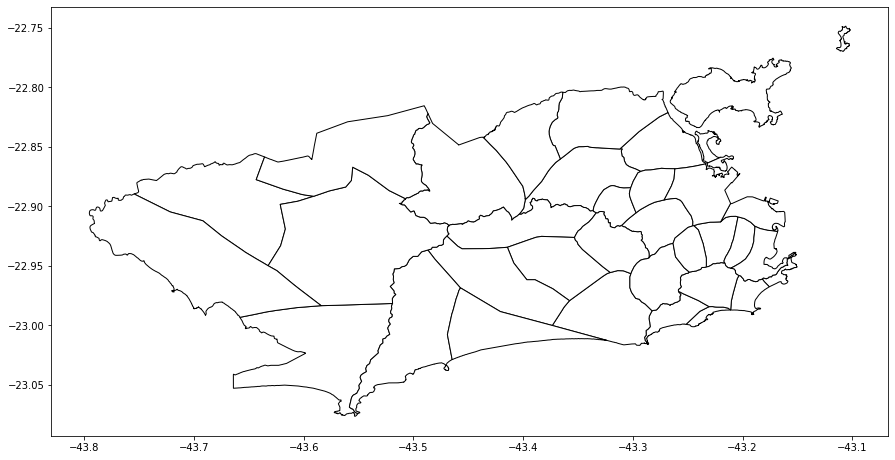

In [19]:
zonasgpd.plot(color='white', edgecolor='black', figsize=(15,8))

In [20]:
alertagpd = gpd.read_file('/home/vinicius.vancellote/Codigos_Python/Bases/EstacoesPluviometricas/Estacoes_Alerta_Rio.geojson')

<AxesSubplot:>

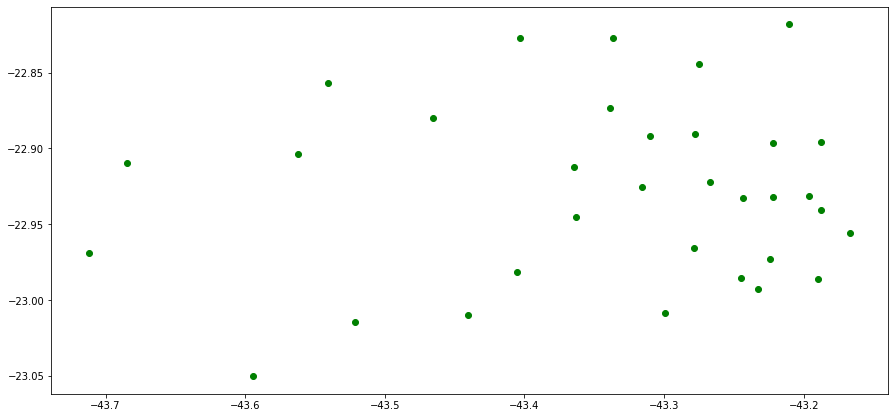

In [21]:
alertagpd.plot(color='green',figsize=(15,8))

In [22]:
join_left_df = alertagpd.sjoin(zonasgpd, how="left")
join_left_df
# Note the NaNs where the point did not intersect a boro

,OBJECTID_1,Endereço_left,Est_left,Cod_left,geometry,index_right,OBJECTID,Name,Endereço_right,Est_right,Cod_right,ShapeSTArea,ShapeSTLength
0,34,"Rua Cardoso Junior, 479",Laranjeiras,31,POINT Z (-43.18746 -22.94055 0.00000),30.0,31.0,Região 31,"Rua Cardoso Junior, 479",Laranjeiras,31.0,1.244945e+07,24168.087474
1,35,"Campo de São Cristóvão, 268",São Cristóvão,32,POINT Z (-43.22163 -22.89666 0.00000),31.0,32.0,Região 32,"Campo de São Cristóvão, 268",São Cristóvão,32.0,2.524903e+07,34828.544754
2,36,"Rua Godofredo Viana, 64",Jacarepaguá/Tanque,14,POINT Z (-43.36468 -22.91249 0.00000),13.0,14.0,Região 14,"Rua Godofredo Viana, 64",Jacarepaguá/Tanque,14.0,3.695871e+07,35106.581567
3,37,"Rua Fonseca, 534",Bangu,12,POINT Z (-43.46579 -22.88027 0.00000),11.0,12.0,Região 12,"Rua Fonseca, 534",Bangu,12.0,7.021296e+07,42652.194634
4,38,"Rua Antúria, 31",Anchieta,24,POINT Z (-43.40329 -22.82693 0.00000),23.0,24.0,Região 24,"Rua Antúria, 31",Anchieta,24.0,3.641555e+07,29201.977390
5,39,"Rua Eng. Trindade, 229",Campo Grande,26,POINT Z (-43.56190 -22.90360 0.00000),25.0,26.0,Região 26,"Rua Eng. Trindade, 229",Campo Grande,26.0,1.278895e+08,51055.900721
6,40,Praça Ruão s/nº,Santa Cruz,22,POINT Z (-43.68440 -22.90943 0.00000),21.0,22.0,Região 22,Praça Ruão s/nº,Santa Cruz,22.0,7.758097e+07,46703.901525
7,41,Rua do Império s/n,Sepetiba,27,POINT Z (-43.71163 -22.96888 0.00000),26.0,27.0,Região 27,Rua do Império s/n,Sepetiba,27.0,1.085611e+08,57572.961627
8,42,"Estrada Barra de Guaratiba, 9140",Guaratiba,20,POINT Z (-43.59468 -23.05027 0.00000),19.0,20.0,Região 20,"Estrada Barra de Guaratiba, 9140",Guaratiba,20.0,8.499727e+07,59178.029000
9,43,"Avenida das Américas, 459",Grota Funda,25,POINT Z (-43.52135 -23.01443 0.00000),24.0,25.0,Região 25,"Avenida das Américas, 459",Grota Funda,25.0,6.795439e+07,46992.804364


<AxesSubplot:>

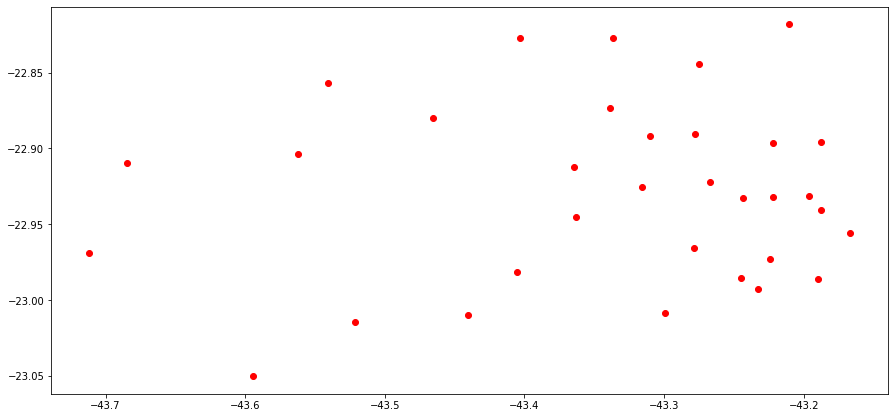

In [23]:
join_left_df.plot(color='red',figsize=(15,8))

In [24]:
zonasgpd

,OBJECTID,Name,Endereço,Est,Cod,ShapeSTArea,ShapeSTLength,geometry
0,1,Região 1,"Av. Niemeyer, 121",Vidigal,1,2.553441e+06,10752.168096,"POLYGON Z ((-43.21083 -22.98706 0.00000, -43.2..."
1,2,Região 2,"Av. Pasteur, 35",Urca,2,2.746435e+06,13636.139715,"POLYGON Z ((-43.17560 -22.96759 0.00000, -43.1..."
2,3,Região 3,"Estrada da Gávea, 242",Rocinha,3,1.066526e+07,18616.442565,"POLYGON Z ((-43.23049 -22.98426 0.00000, -43.2..."
3,4,Região 4,"Estrada do Sumaré, 670",Tijuca,4,1.120025e+07,14796.007172,"POLYGON Z ((-43.20417 -22.90889 0.00000, -43.2..."
4,5,Região 5,"Rua Almirante Alexandrino, 1761",Santa Teresa,5,7.901403e+06,12116.409552,"POLYGON Z ((-43.18861 -22.91683 0.00000, -43.1..."
5,6,Região 6,"Av. Atlântica, 4240",Copacabana,6,7.422574e+06,13793.063174,"POLYGON Z ((-43.18198 -22.96102 0.00000, -43.1..."
6,7,Região 7,"Rua Professor Valadares, 262",Grajaú,7,1.947898e+07,19309.133736,"POLYGON Z ((-43.24541 -22.91645 0.00000, -43.2..."
7,8,Região 8,"Rua Orestes Barbosa, 229",Ilha do Governador,8,3.733704e+07,57467.133777,"MULTIPOLYGON Z (((-43.17174 -22.77662 0.00000,..."
8,9,Região 9,"Largo da Penha, 19",Penha,9,2.979620e+07,36611.597987,"MULTIPOLYGON Z (((-43.22887 -22.83737 0.00000,..."
9,10,Região 10,"Largo da Penha, 19",Madureira,10,3.738247e+07,32071.857528,"POLYGON Z ((-43.31188 -22.85190 0.00000, -43.3..."


In [25]:
alertagpd

,OBJECTID_1,Endereço,Est,Cod,geometry
0,34,"Rua Cardoso Junior, 479",Laranjeiras,31,POINT Z (-43.18746 -22.94055 0.00000)
1,35,"Campo de São Cristóvão, 268",São Cristóvão,32,POINT Z (-43.22163 -22.89666 0.00000)
2,36,"Rua Godofredo Viana, 64",Jacarepaguá/Tanque,14,POINT Z (-43.36468 -22.91249 0.00000)
3,37,"Rua Fonseca, 534",Bangu,12,POINT Z (-43.46579 -22.88027 0.00000)
4,38,"Rua Antúria, 31",Anchieta,24,POINT Z (-43.40329 -22.82693 0.00000)
5,39,"Rua Eng. Trindade, 229",Campo Grande,26,POINT Z (-43.56190 -22.90360 0.00000)
6,40,Praça Ruão s/nº,Santa Cruz,22,POINT Z (-43.68440 -22.90943 0.00000)
7,41,Rua do Império s/n,Sepetiba,27,POINT Z (-43.71163 -22.96888 0.00000)
8,42,"Estrada Barra de Guaratiba, 9140",Guaratiba,20,POINT Z (-43.59468 -23.05027 0.00000)
9,43,"Avenida das Américas, 459",Grota Funda,25,POINT Z (-43.52135 -23.01443 0.00000)
